## Ocena czasu potrzebnego na dekodowanie filmu (Online Video Characteristics and Transcoding Time)

In [15]:
import pandas as pd

youtube_videos = pd.read_csv('youtube_videos.tsv', sep='\t')
transcoding_mesurment = pd.read_csv('transcoding_mesurment.tsv', sep='\t')

## Analiza i "doszlifowanie" danych

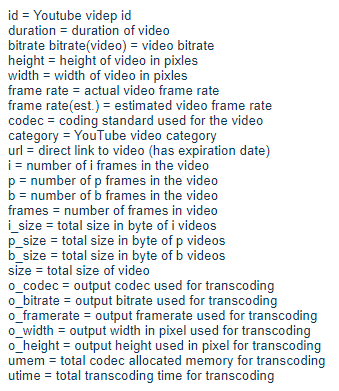

I-frame i P-frame to rodzaje klatek wideo w kodeku H.264, który jest jednym z najpopularniejszych kodeków wideo używanych do kompresji i dekompresji strumieni wideo.

<font color='red'>I-frame</font> (Intra-coded frame) to klatka, która zawiera pełny obraz i może być odtworzona bez potrzeby dostępu do innych klatek. Jest to podstawowa klatka w kodeku H.264 i jest używana do tworzenia nowych sekwencji wideo.

<font color='red'>P-frame</font> (Predicted frame) to klatka, która zawiera informacje tylko o zmianach obrazu w stosunku do poprzedniej klatki. P-frame jest mniej dokładny niż I-frame, ale pozwala na bardziej efektywną kompresję danych, ponieważ zawiera mniej informacji.

W kodeku H.264, I-frame i P-frame są używane w połączeniu, aby umożliwić skuteczną kompresję wideo i umożliwić odtwarzanie strumieni wideo z wysoką jakością obrazu.

<font color='red'>B-frame</font> (Bidirectional-predicted frame) to rodzaj klatki wideo w kodeku H.264, który jest jednym z najpopularniejszych kodeków wideo używanych do kompresji i dekompresji strumieni wideo. B-frame jest używany do zapisywania informacji o zmianach obrazu w stosunku do poprzedniej i następnej klatki.

B-frame jest bardziej skuteczny w kompresji danych niż P-frame, ponieważ zawiera informacje o zmianach obrazu w stosunku do dwóch klatek, a nie tylko jednej. Jednak B-frame wymaga dostępu do obu poprzedniej i następnej klatki, co może być trudne w przypadku strumieni wideo z dużą liczbą klatek.

In [16]:
transcoding_mesurment.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [17]:
transcoding_mesurment.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


 Widzimy że cechy: B, i B-size są dla wszystkich krotek takie same, co negatywnie wpływa na jakość modelu, do usunięcia. Usuwamy umem i id z uwagi na to że są zbędne. Umem nie będzie dostępny przed przystąpieniem do transkrypcji.

Podmieniamy wartości stringowe codec i o_codec na odpowiednie wartości całkowite

In [18]:
transcoding_mesurment['codec_int'], categories = transcoding_mesurment['codec'].factorize()
transcoding_mesurment['o_codec_int'], categories = transcoding_mesurment['o_codec'].factorize()

In [19]:
transcoding_mesurment.drop(columns=['id', 'codec', 'o_codec', 'umem'], inplace=True)

Analiza współzależności

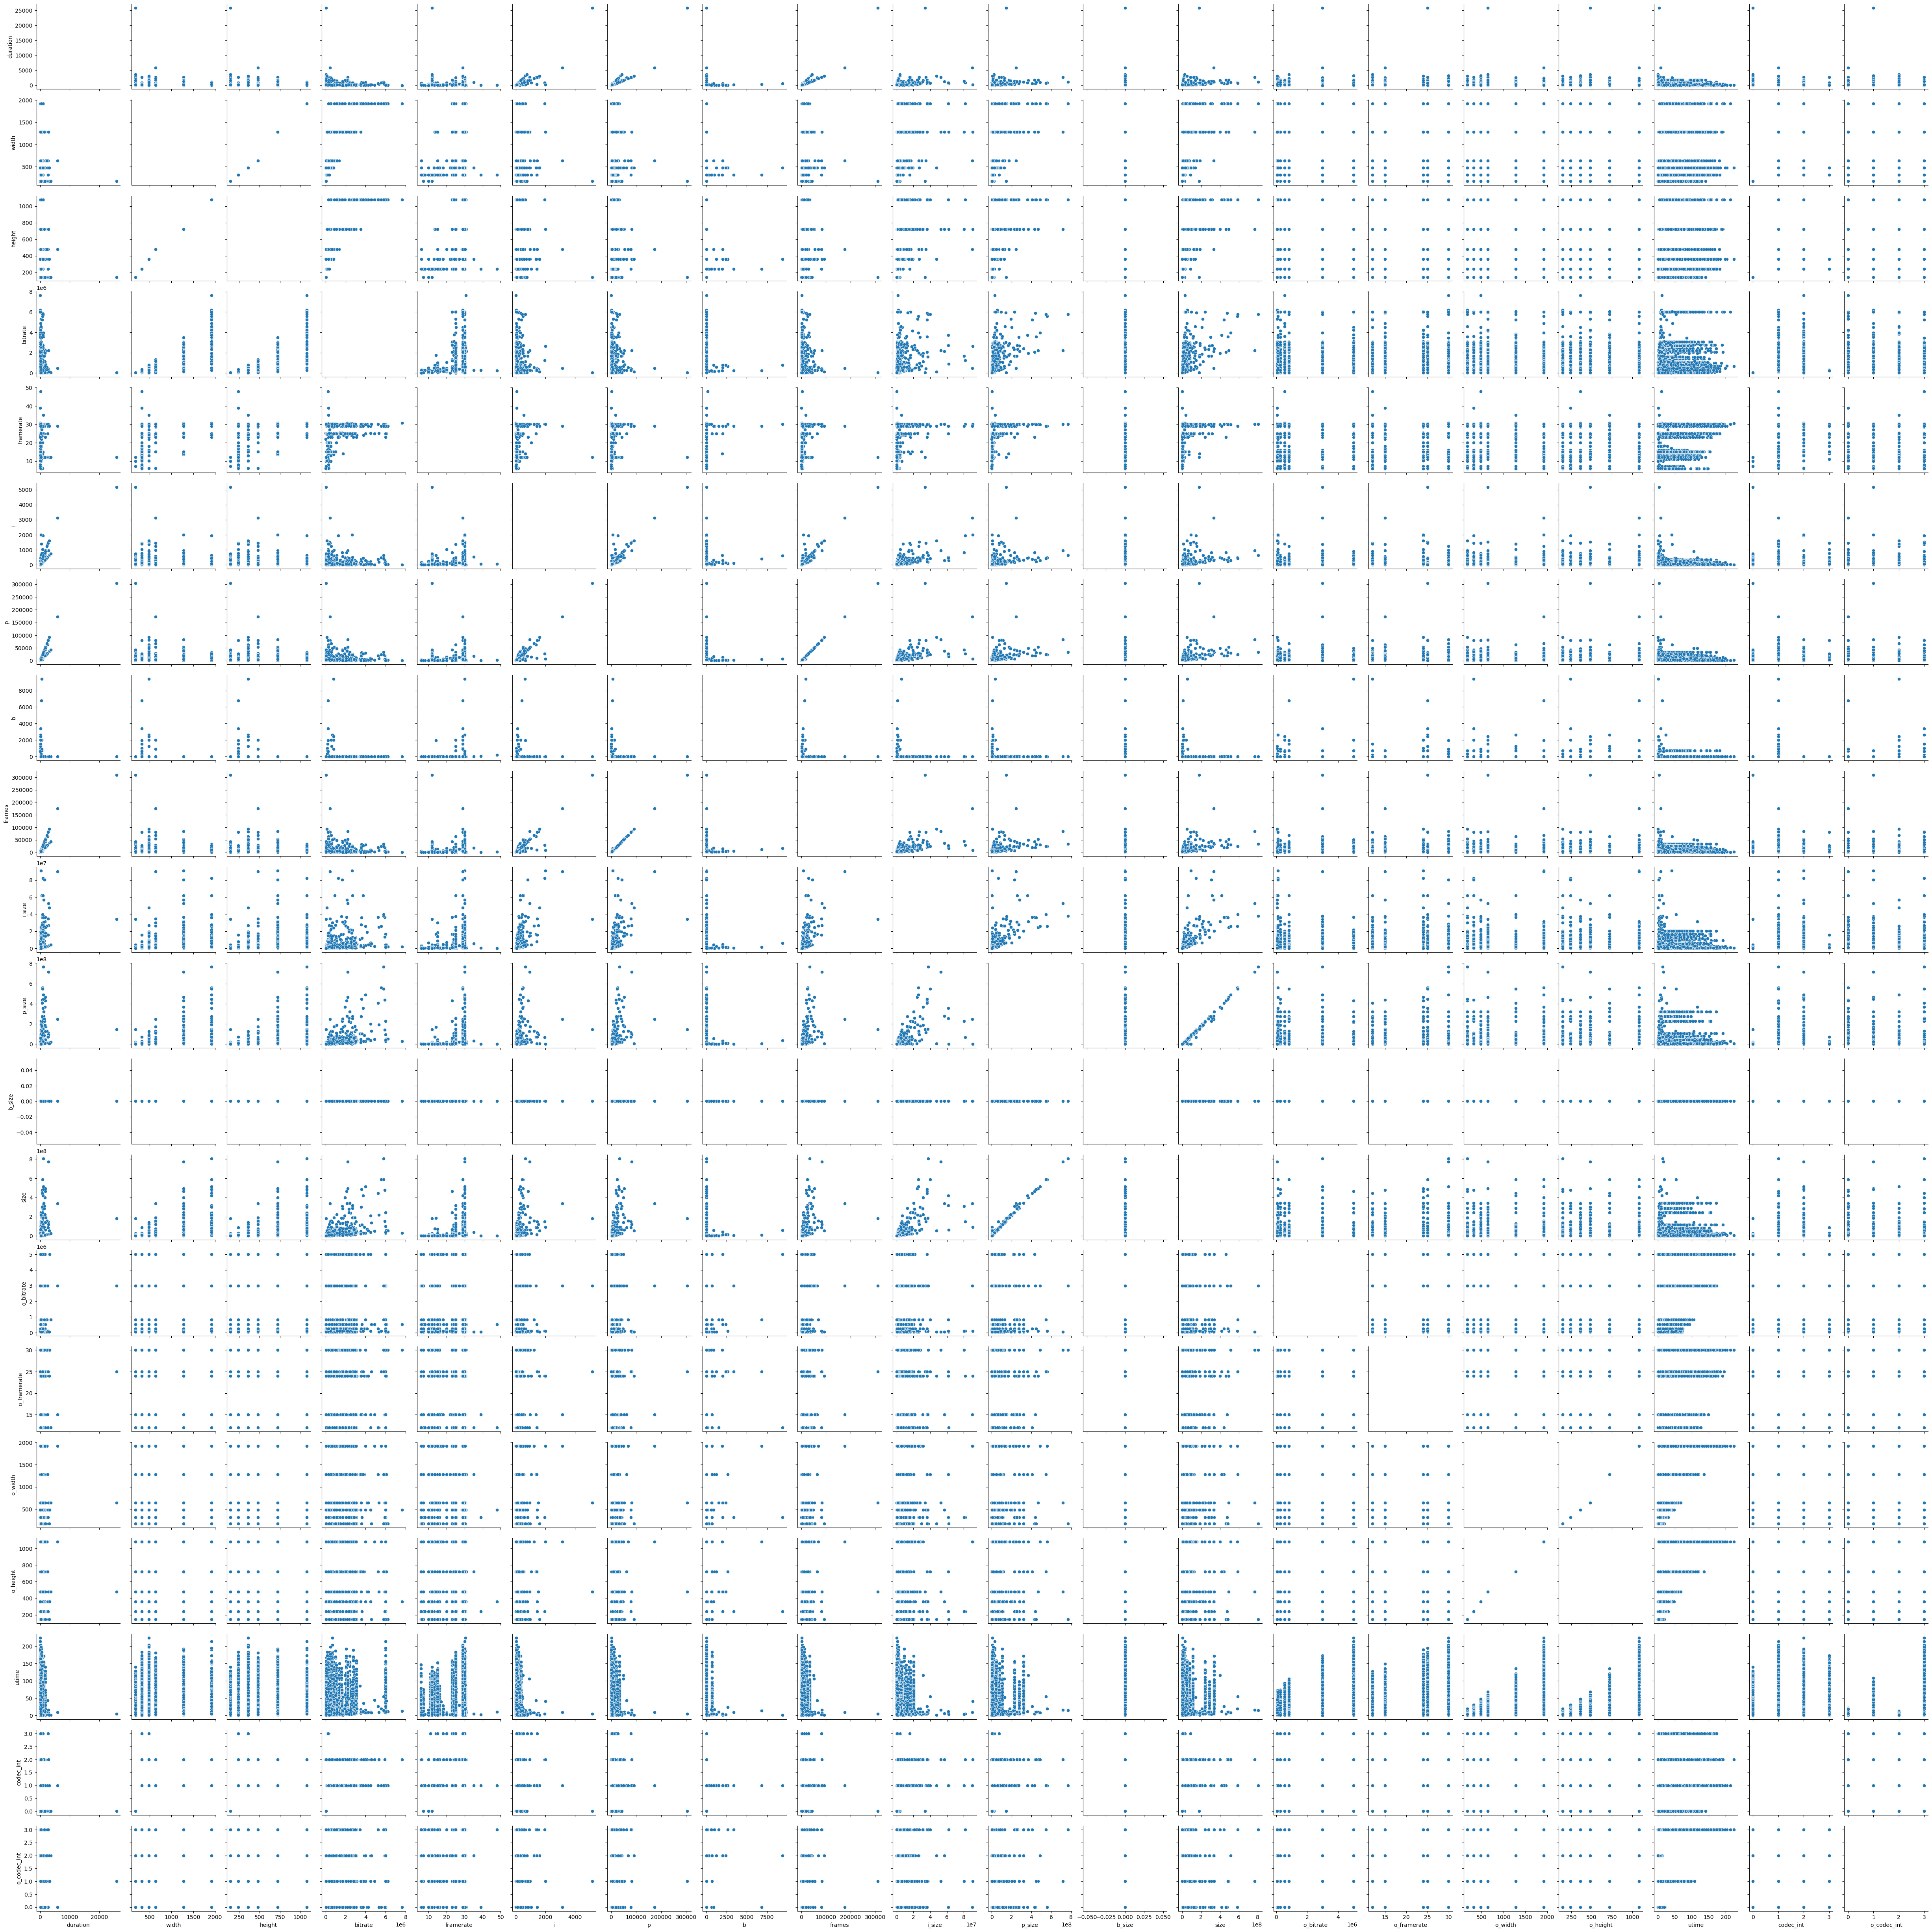

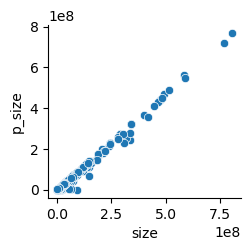

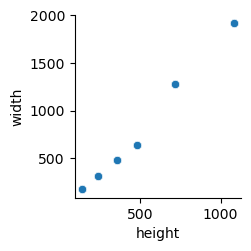

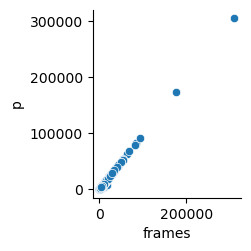

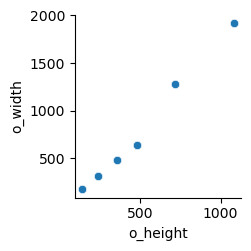

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(transcoding_mesurment, diag_kind="kode")
sb.pairplot(transcoding_mesurment,x_vars=['size'], y_vars=['p_size'], diag_kind="kode")
sb.pairplot(transcoding_mesurment,x_vars=['height'], y_vars=['width'], diag_kind="kode")
sb.pairplot(transcoding_mesurment,x_vars=['frames'], y_vars=['p'], diag_kind="kode")
sb.pairplot(transcoding_mesurment,x_vars=['o_height'], y_vars=['o_width'], diag_kind="kode")

Znalezione dane współzależne należy usunąć (jedno z nich). Możemy również w taki razie zauważyć jako ciekawostke że większość wideo używa w większości P-frame'ów skoro p_size i p rośnie podobnie do size i frame. Widzimy że w tych dataframie nie używano b-framów więc b i b_size prawdopodobnie będą do usunięcia.

Sprawdźmy co RFE powie nam o cechach

duration: 5
width: 3
height: 2
bitrate: 6
framerate: 1
i: 1
p: 1
b: 1
frames: 1
i_size: 9
p_size: 7
b_size: 11
size: 8
o_bitrate: 10
o_framerate: 1
o_width: 1
o_height: 4
utime: 1


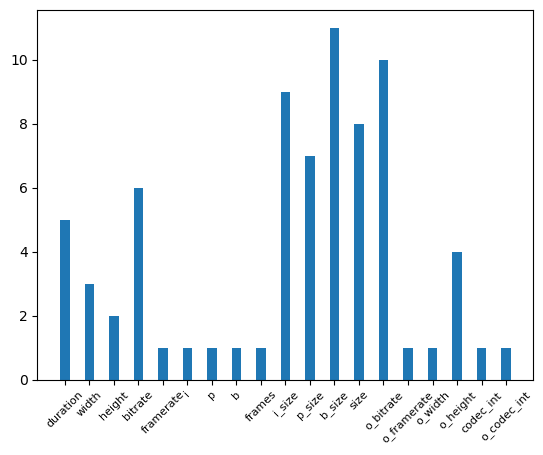

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(LinearRegression())
rfe.fit(transcoding_mesurment.drop(columns=["utime"]), transcoding_mesurment.iloc[:]['utime'])

ranking = rfe.ranking_

for x in range(0,ranking.shape[0]-1):
    print("{0}: {1}".format(transcoding_mesurment.columns[x],ranking[x]))

x_values = transcoding_mesurment.drop(columns=["utime"]).columns.to_list()

# Wartości dla osi Y
y_values = ranking.tolist()

# Ustawienie szerokości słupków
bar_width = 0.4

# Stworzenie wykresu słupkowego
plt.bar(range(len(x_values)), y_values, width=bar_width)

# Wyświetlenie nazw osi x pod wykresem
plt.xticks(range(len(x_values)), x_values, fontsize=8, rotation=45)

# Wyświetlenie wykresu
plt.show()

In [22]:
transcoding_mesurment.drop(columns=['i_size','p_size','b_size','size', 'o_bitrate','width','o_height' ], inplace=True)

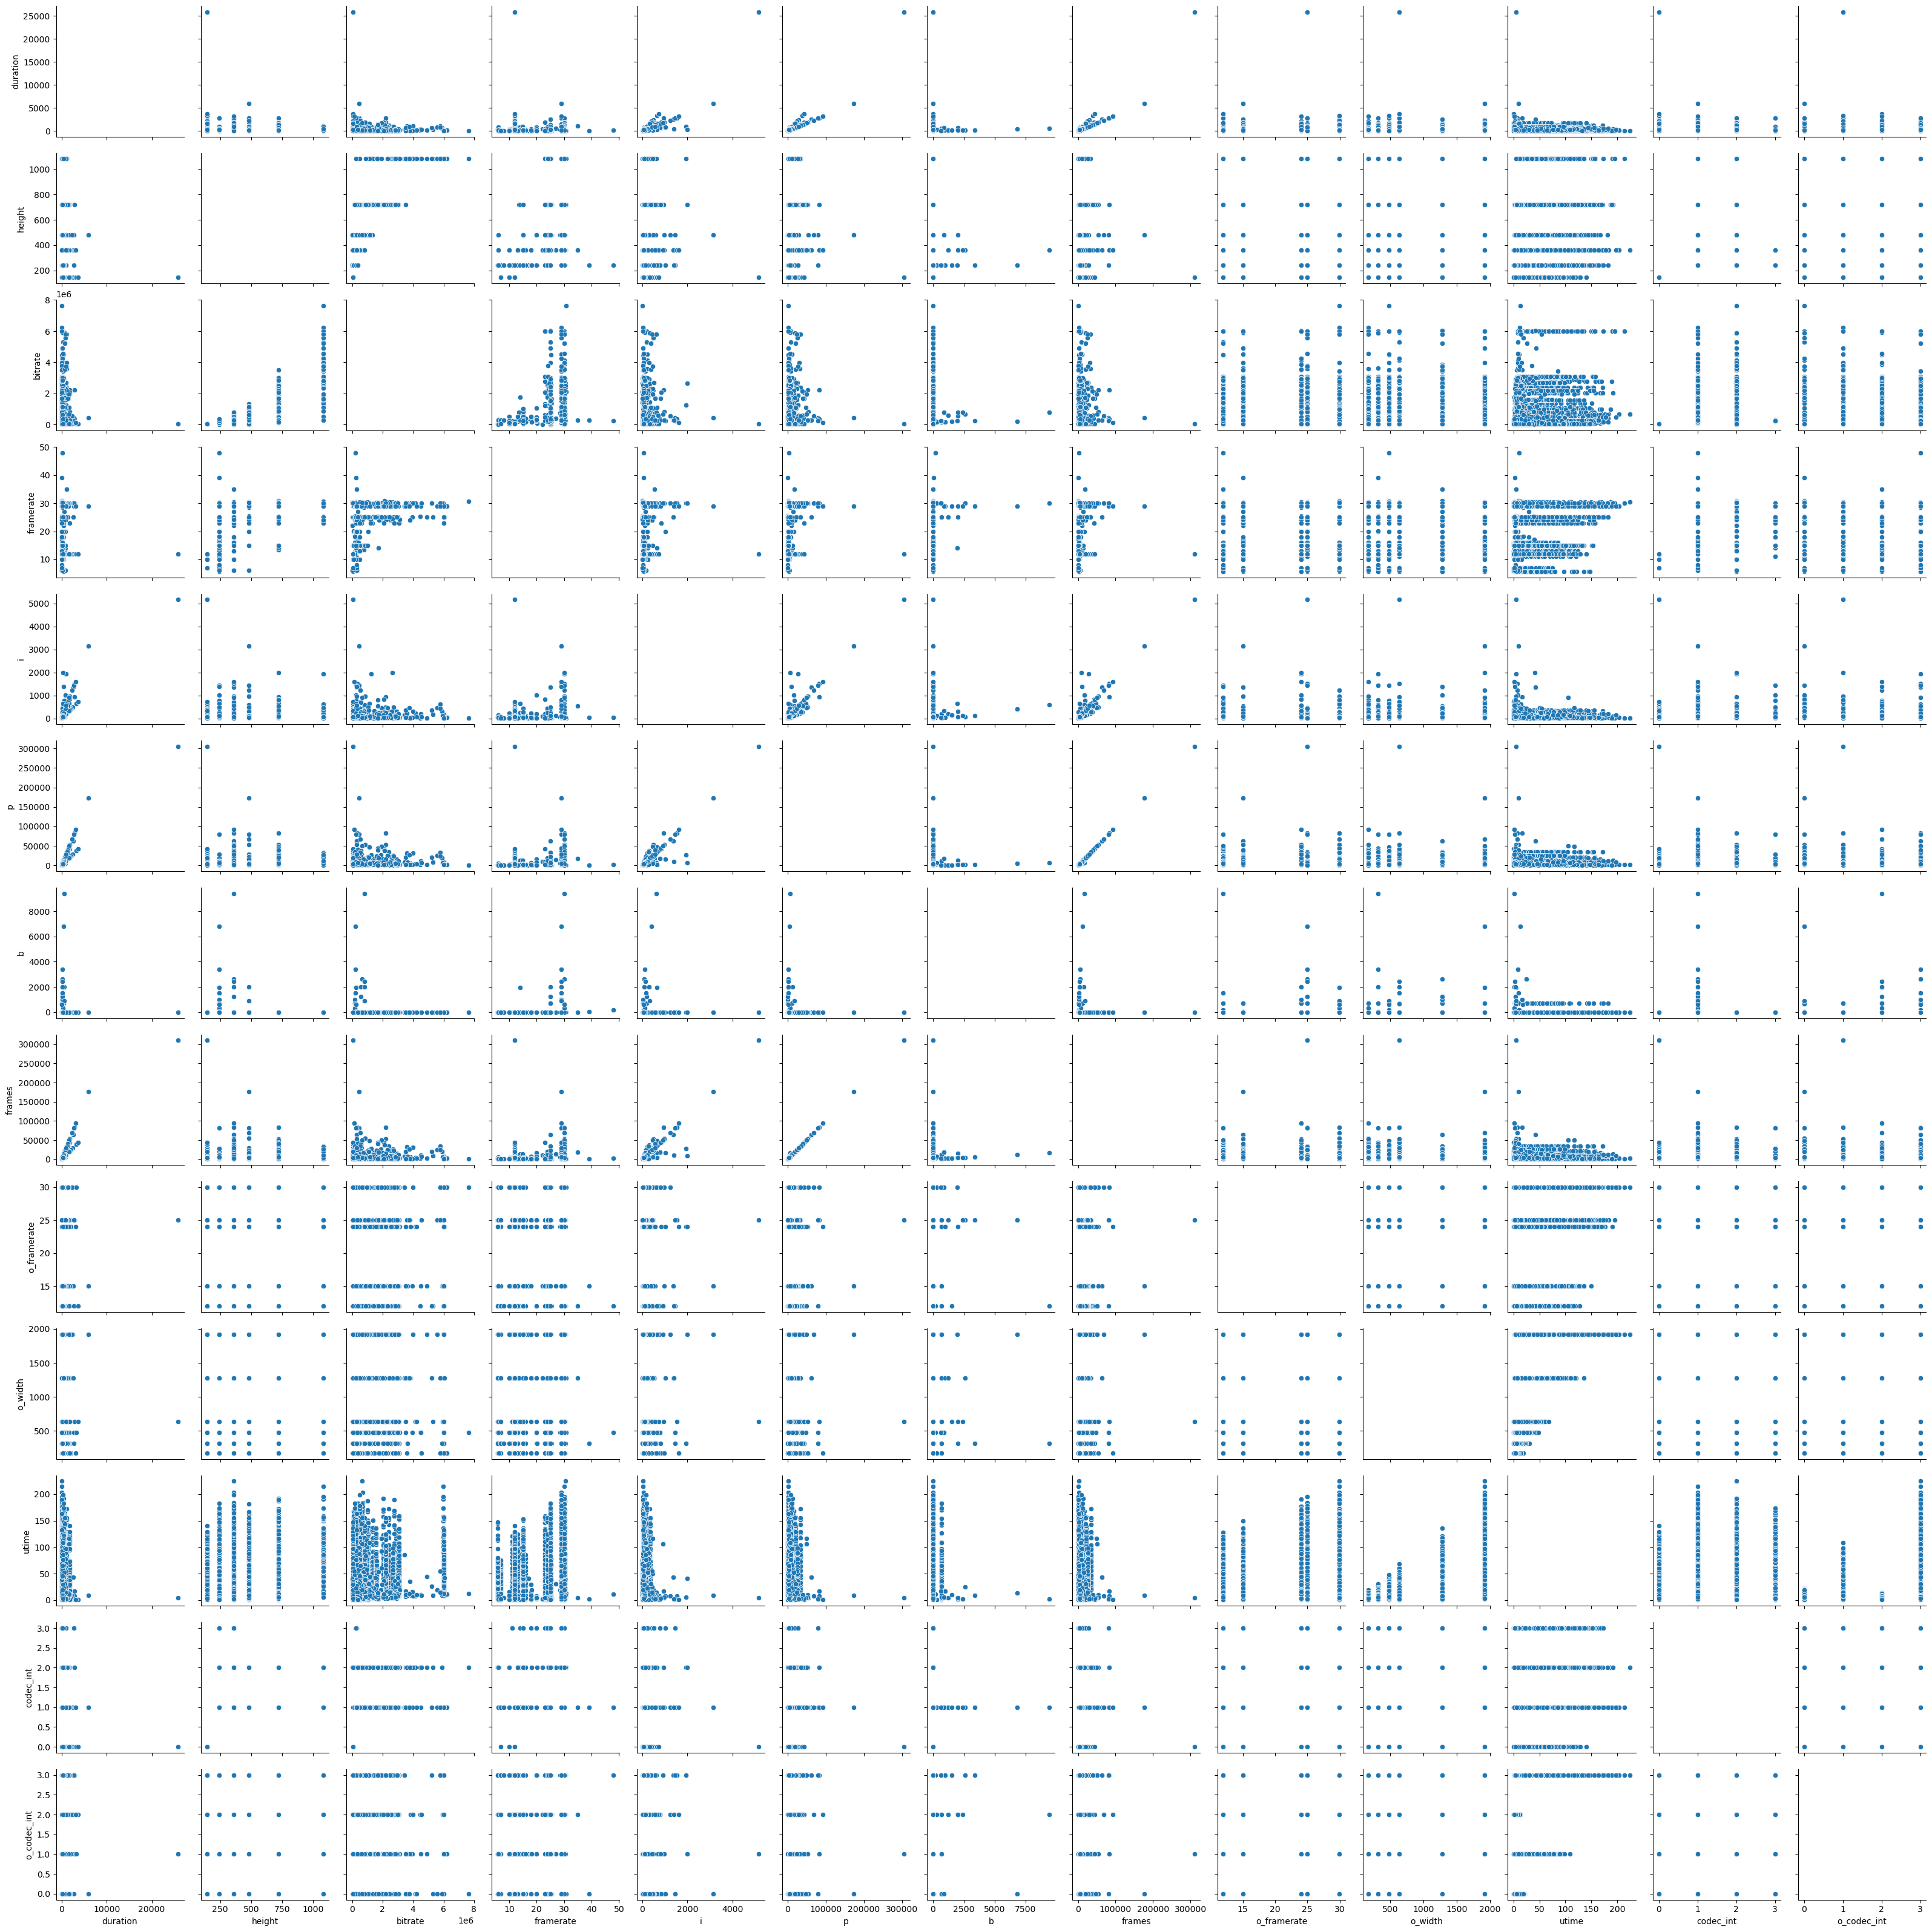

In [23]:
sb.pairplot(transcoding_mesurment, diag_kind="kode")

Po przygotowaniu danych, nasz data frame wygląda w ten sposób:

In [24]:
transcoding_mesurment.describe()

,duration,height,bitrate,framerate,i,p,b,frames,o_framerate,o_width,utime,codec_int,o_codec_int
count,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,21.190862,802.336357,9.996355,1.291565,1.494388
std,287.257650,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,6.668703,609.959797,16.107429,0.868744,1.117768
min,31.080000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,12.000000,176.000000,0.184000,0.000000,0.000000
25%,106.765000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,15.000000,320.000000,2.096000,1.000000,0.000000
50%,239.141660,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,24.000000,480.000000,4.408000,1.000000,1.000000
75%,379.320000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,25.000000,1280.000000,10.433000,2.000000,2.000000
max,25844.086000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,29.970000,1920.000000,224.574000,3.000000,3.000000


## Processing data

Zaczniemy od podziału danych

Ustalmy najlepszy podział danych

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import math as a

wyniki_MSE, wynikiR2 = [],[]
for x in range(1,500):
#podział danych
    main_train_data, main_test_data, \
    main_train_target, main_test_target = \
    train_test_split(transcoding_mesurment.drop(columns=["utime"]), transcoding_mesurment.iloc[:]['utime'], test_size=0.001*x, random_state=23)

#Wytrenowanie modelu
    Lr = LinearRegression()
    Lr.fit(main_train_data, main_train_target)

#Testy
    wyniki_MSE.append(mean_squared_error(main_test_target, Lr.predict(main_test_data)))
    wynikiR2.append(r2_score(main_test_target, Lr.predict(main_test_data)))

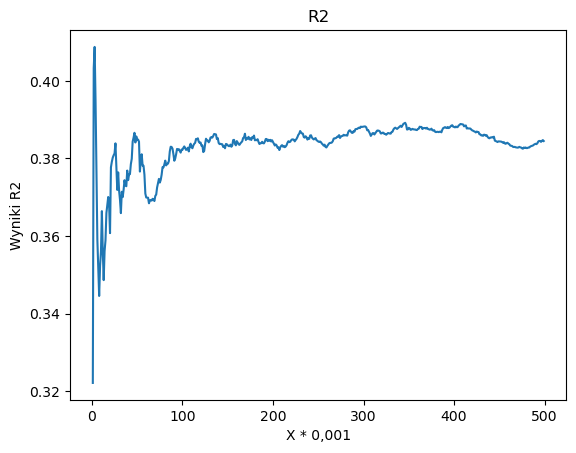

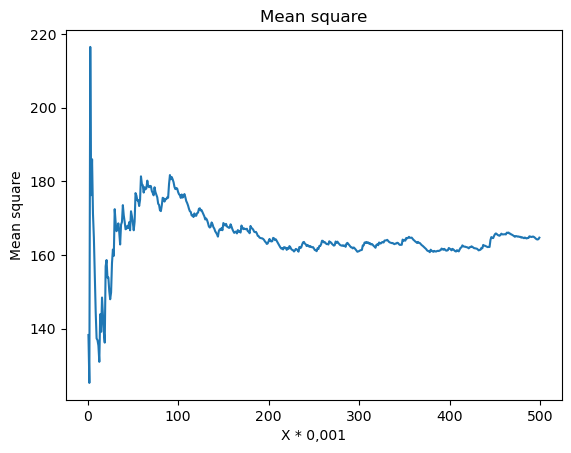

In [26]:
# Tworzenie pierwszego wykresu
plt.plot(range(1,500) , wynikiR2)
plt.xlabel('X * 0,001')
plt.ylabel('Wyniki R2')
plt.title('R2')


plt.show()

# Tworzenie drugiego wykresu
plt.plot(range(1,500),wyniki_MSE)
plt.xlabel('X * 0,001')
plt.ylabel('Mean square')
plt.title('Mean square')


plt.show()

widzimy że po test_size ok. 0.1 stablizuje się wynik więc przy takim test size zostaniemy

In [27]:
#podział danych
main_train_data, main_test_data, \
main_train_target, main_test_target = \
train_test_split(transcoding_mesurment.drop(columns=["utime"]), transcoding_mesurment.iloc[:]['utime'], test_size=0.1, random_state=64)



print("Training dataset:")
print("patients_train_data:", main_train_data.shape)
print("patients_train_target:", main_train_target.shape)
print("\n")

print("Testing dataset:")
print("patients_test_data:", main_test_data.shape)
print("patients_test_target:", main_test_target.shape)
print("\n")

Training dataset:
patients_train_data: (61905, 12)
patients_train_target: (61905,)


Testing dataset:
patients_test_data: (6879, 12)
patients_test_target: (6879,)




Stwórzmy bazową jakość modelu (bez żadnych zmian)

In [28]:
### TRENING I TESTOWANIE MODELU ###

#Wytrenowanie modelu
Lr = LinearRegression()
Lr.fit(main_train_data, main_train_target)

#Testy
print('Variance score: %.2f' % r2_score(main_test_target, Lr.predict(main_test_data)))
print("\n")

print("Mean squared error of a learned model: %.2f" % 
      mean_squared_error(main_test_target, Lr.predict(main_test_data)))
print("\n")

bazowy_MSE = mean_squared_error(main_test_target, Lr.predict(main_test_data))
bazowy_R2 = r2_score(main_test_target, Lr.predict(main_test_data))

#Przykładowe wyniki
answer = Lr.predict(main_test_data)
for test_index in range(3):
    print("ID.{0}".format(test_index))
    print("Model predicted for id {0} is value {1}".format(test_index, round(answer[test_index],3)))
    print("Real value for id {0} is {1}".format(test_index, main_test_target.iloc[test_index]))
    print("Diff = {0}".format(round(abs(main_test_target.iloc[test_index] - answer[test_index]),3)))
    print("\n")

Variance score: 0.39


Mean squared error of a learned model: 167.34


ID.0
Model predicted for id 0 is value 29.268
Real value for id 0 is 40.763
Diff = 11.495


ID.1
Model predicted for id 1 is value 7.661
Real value for id 1 is 3.988
Diff = 3.673


ID.2
Model predicted for id 2 is value 7.61
Real value for id 2 is 7.292
Diff = 0.318




Przetestujmy model Lasso regression

In [29]:
from sklearn.linear_model import Lasso
scoreR2=[]
for x in range(1,10):
    lasso_regression = Lasso(alpha=0.1*x)
    lasso_regression.fit(main_train_data, main_train_target)
    scoreR2.append(lasso_regression.score(main_test_data, main_test_target)) #r2 score

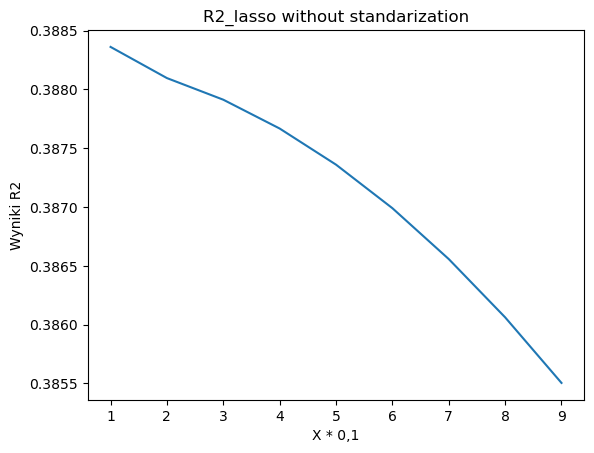

Najelpsze R2 - 0.388


In [30]:
# Tworzenie pierwszego wykresu
plt.plot(range(1,10) , scoreR2)
plt.xlabel('X * 0,1')
plt.ylabel('Wyniki R2')
plt.title('R2_lasso without standarization')

plt.show()
print("Najelpsze R2 - {:.3f}".format(max(scoreR2)))

Przetestujmy Polynomial features do generacji większej ilości zmiennych oraz lasso do wybrania najabrdziej użytecznych

In [31]:
from sklearn.preprocessing import PolynomialFeatures

wynikiMSE = []
wynikiR2 = []
for x in range(1, 6):
    print("Pracuję nad {0}".format(x))
    pt=PolynomialFeatures(x)
    main_train_data_poly = pt.fit_transform(main_train_data)
    main_test_data_poly = pt.fit_transform(main_test_data)
    print("Ilość cech - {0}".format(main_train_data_poly.shape[1]))
    lr_poly = Lasso()
    lr_poly.fit(main_train_data_poly, main_train_target)
    wynikiMSE.append(mean_squared_error(main_test_target, lr_poly.predict(main_test_data_poly)))
    wynikiR2.append(r2_score(main_test_target, lr_poly.predict(main_test_data_poly)))

Pracuję nad 1
Ilość cech - 13
Pracuję nad 2
Ilość cech - 91


f:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.030e+06, tolerance: 1.596e+03
  model = cd_fast.enet_coordinate_descent(


Pracuję nad 3
Ilość cech - 455


f:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.312e+06, tolerance: 1.596e+03
  model = cd_fast.enet_coordinate_descent(


Pracuję nad 4
Ilość cech - 1820


f:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.191e+06, tolerance: 1.596e+03
  model = cd_fast.enet_coordinate_descent(


Pracuję nad 5
Ilość cech - 6188


f:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.853e+06, tolerance: 1.596e+03
  model = cd_fast.enet_coordinate_descent(


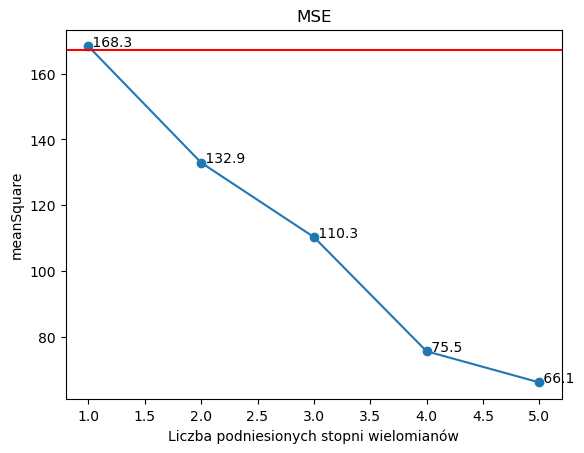

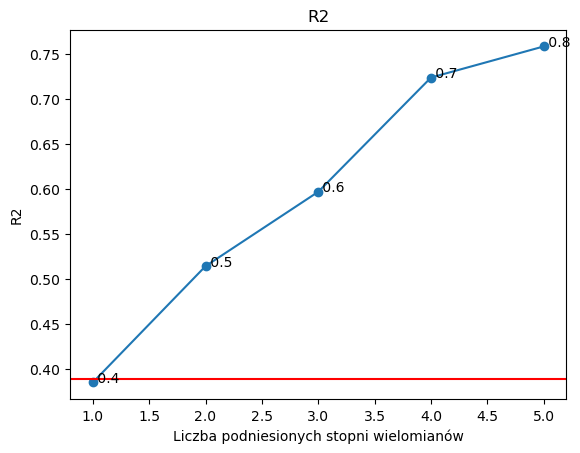

In [32]:
# Tworzenie pierwszego wykresu
plt.plot(range(1, 6) , wynikiMSE,marker="o")
plt.xlabel('Liczba podniesionych stopni wielomianów')
plt.ylabel('meanSquare')
plt.title('MSE')

for x, y in zip(range(1, main_train_data.shape[1]), wynikiMSE):
    plt.annotate(f' {y:.1f}', (x, y),)


plt.axhline(bazowy_MSE, color='red',)
plt.show()

# Tworzenie drugiego wykresu
plt.plot(range(1, 6) , wynikiR2,marker="o")
plt.xlabel('Liczba podniesionych stopni wielomianów')
plt.ylabel('R2')
plt.title('R2')

for x, y in zip(range(1, main_train_data.shape[1]), wynikiR2):
    plt.annotate(f' {y:.1f}', (x, y),)


plt.axhline(bazowy_R2, color='red',)
plt.show()


Widzimy pozytywną zmianę (w większości przypadków) przy drugim stopniu wielomianu

## Finalny model

In [33]:
pt=PolynomialFeatures(5)
main_train_data_poly = pt.fit_transform(main_train_data)
main_test_data_poly = pt.fit_transform(main_test_data)
ls_poly = Lasso()
ls_poly.fit(main_train_data_poly, main_train_target)
print("Wynik MSE : {0}".format(mean_squared_error(main_test_target,ls_poly.predict(main_test_data_poly))))
print("Wynik R2 : {0}".format(r2_score(main_test_target,ls_poly.predict(main_test_data_poly))))

f:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.853e+06, tolerance: 1.596e+03
  model = cd_fast.enet_coordinate_descent(


Wynik MSE : 66.06654947057869
Wynik R2 : 0.7585555610015702


In [34]:
main_train_data_poly.shape

(61905, 6188)

Spróbujmy zmniejszyć ilość cech (i poprawić pod względem overfittinu)

In [35]:
# rfe_poly_lasso=RFE(ls_poly,verbose=True)
# main_train_data_poly_lasso = rfe_poly_lasso.fit_transform(main_train_data_poly,main_train_target)
# main_test_data_poly_lasso = rfe_poly_lasso.fit_transform(main_test_data_poly,main_test_target)

## Wnioski i wyniki

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ls_poly, transcoding_mesurment.drop(columns=["utime"]), transcoding_mesurment.iloc[:]['utime'], cv=4, scoring='neg_mean_squared_error',n_jobs=5)
scores = -scores
print("\nŚredni błąd średniokwadratowy:", scores.mean())
print("\nOdchylenie standardowe błędu średniokwadratowego:", scores.std())
print("\nNajmniejszy błąd średniokwadratowy:", scores.min())


Średni błąd średniokwadratowy: 161.2529337083469

Odchylenie standardowe błędu średniokwadratowego: 7.212442185957134

Najmniejszy błąd średniokwadratowy: 149.5174199792912


In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ls_poly, transcoding_mesurment.drop(columns=["utime"]), transcoding_mesurment.iloc[:]['utime'], cv=4,n_jobs=3)
print("\nŚredni R2:", scores.mean())
print("\nOdchylenie standardowe R2:", scores.std())
print("\nNajlepsze R2:", scores.max())


Średni R2: 0.37680006416726214

Odchylenie standardowe R2: 0.01396757742423181

Najlepsze R2: 0.38566919619502793


## Wizualizacja dopasowania modelu do danych

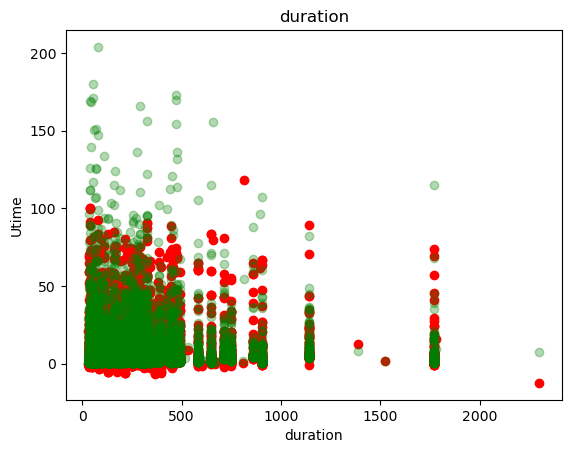

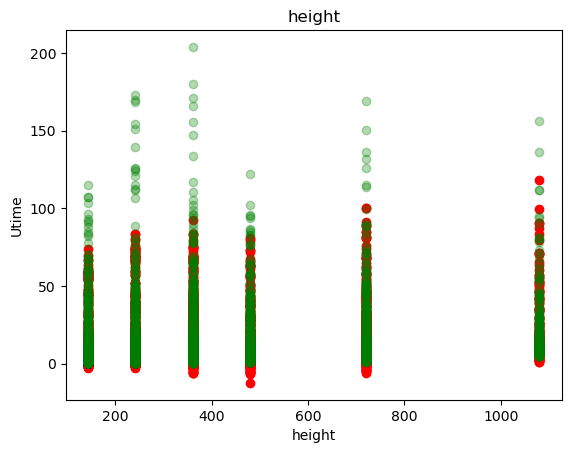

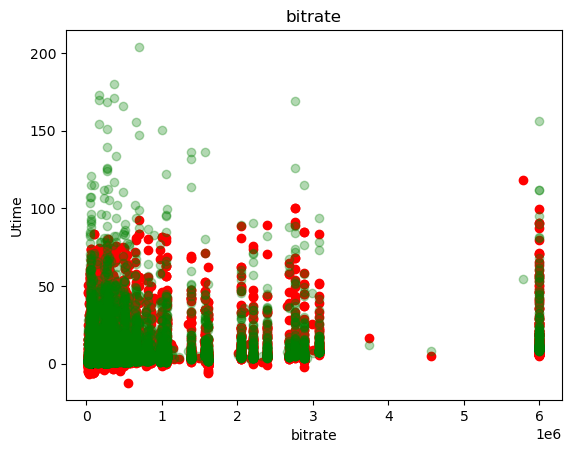

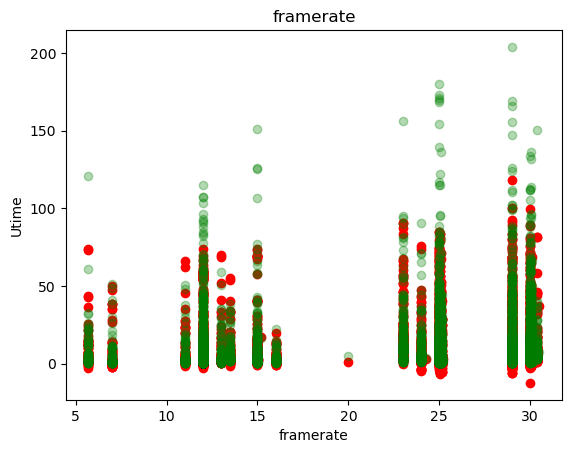

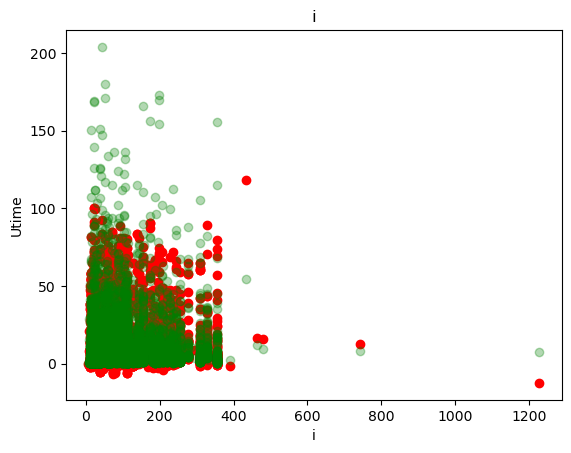

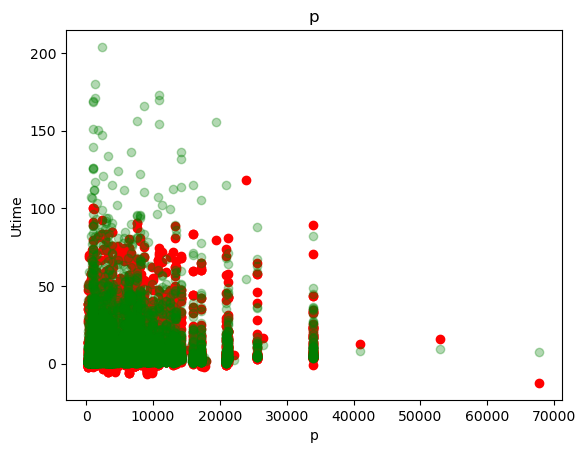

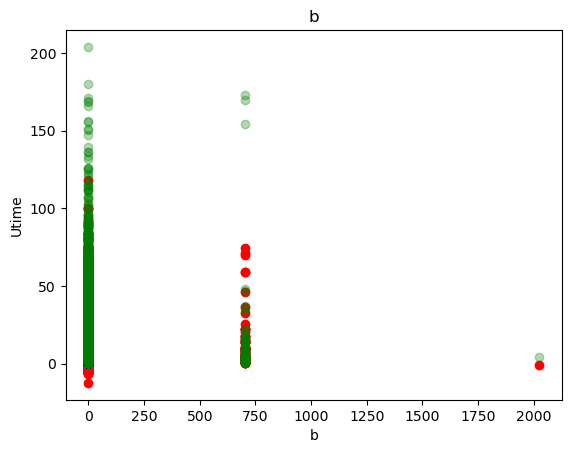

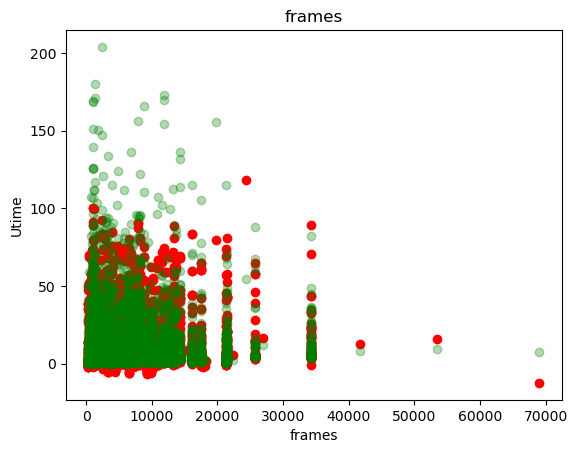

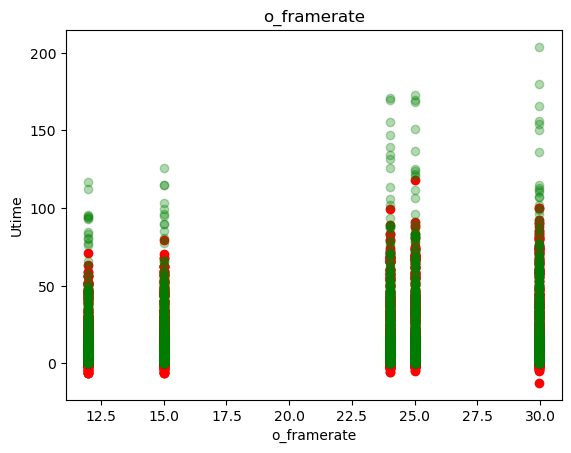

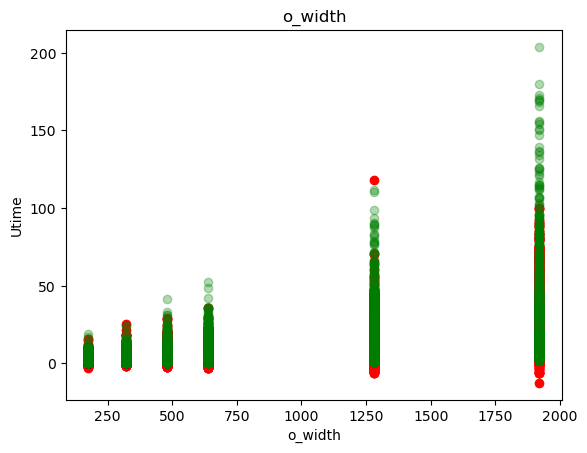

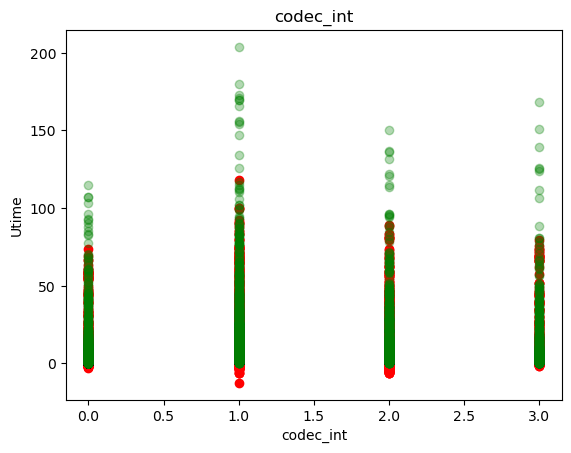

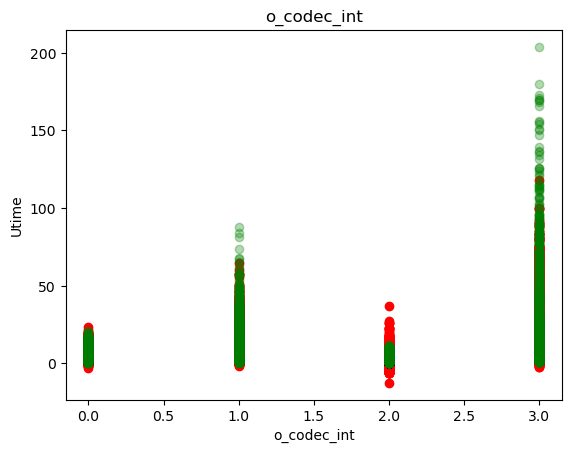

In [38]:
answer = ls_poly.predict(main_test_data_poly)
for x in range(0,main_test_data.shape[1]):
    plt.scatter(main_test_data.iloc[:,x],answer, color='red')
    plt.scatter(main_test_data.iloc[:,x],main_test_target, color='green',alpha=0.3)
    plt.title(main_test_data.columns[x])
    plt.xlabel(main_test_data.columns[x])
    plt.ylabel('Utime')
    plt.show()